In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

On autorise à panda de tout print et pas seulement une partie des lignes et colonnes:

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

On load le dataset

In [4]:
df = pd.read_excel('dataset.xlsx')
dataset = df.copy()
y = dataset['SARS-Cov-2 exam result']
dataset.shape


(5644, 111)

TYPE DE DONNEES  du dataset

In [ ]:
dataset.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

VISUALISER LES NaN

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

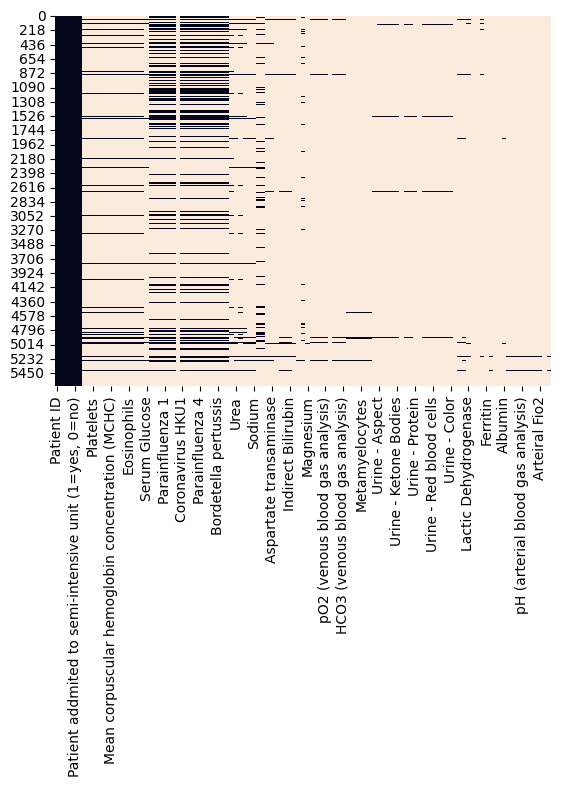

In [ ]:
sns.heatmap(dataset.isna(),cbar = False)
# Par ordre croissant de NaN
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)



Enlever les variables ayant plus de 90% de NaN puis les visualiser


<Axes: >

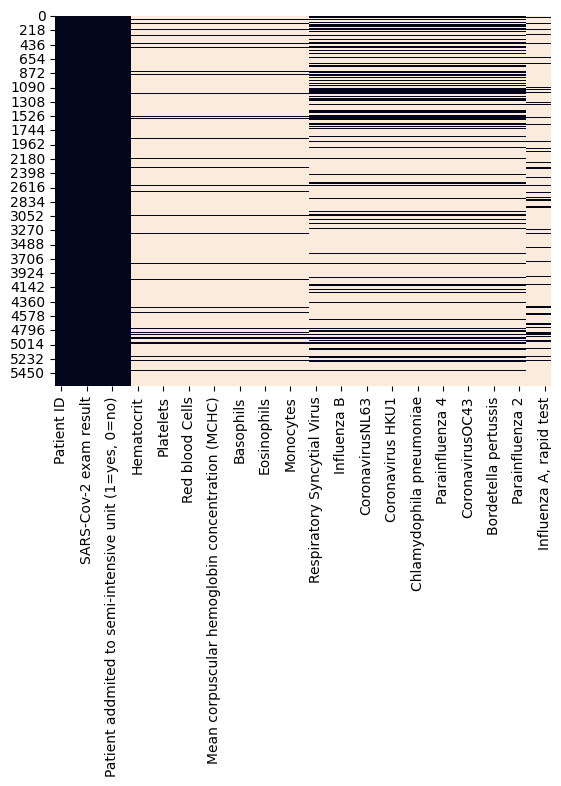

In [ ]:
missing_rate = dataset.isna().sum()/dataset.shape[0]
dataset = dataset[dataset.columns[dataset.isna().sum()/dataset.shape[0]<0.9]]
sns.heatmap(dataset.isna(),cbar = False)


On enlève l'ID des patients

In [ ]:
dataset.drop(['Patient ID'],axis=1,inplace=True)
dataset.drop(['SARS-Cov-2 exam result'],axis=1,inplace=True)



Bcp plus de cas pos que de cas nég => score F1 et pas accuracy


In [39]:
y.value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

Les variables sont déjà passées par un StandardScaler (moyenne = 0 et variance = 1)


C:\Users\sami\AppData\Local\Temp\ipykernel_13784\3772695893.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

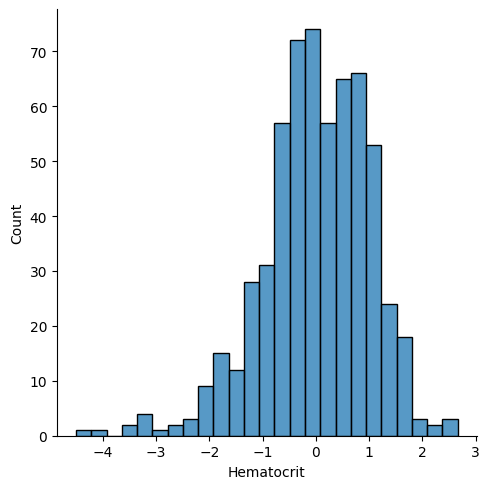

<Figure size 640x480 with 0 Axes>

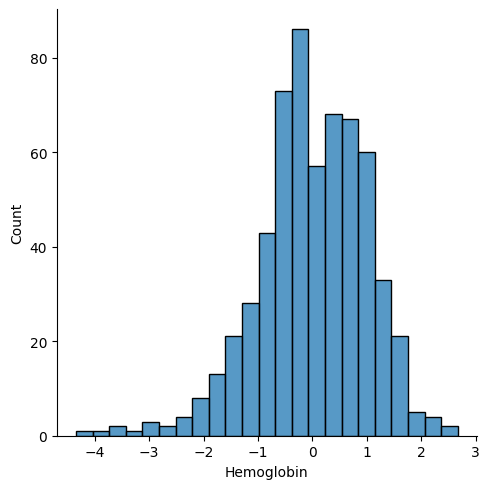

<Figure size 640x480 with 0 Axes>

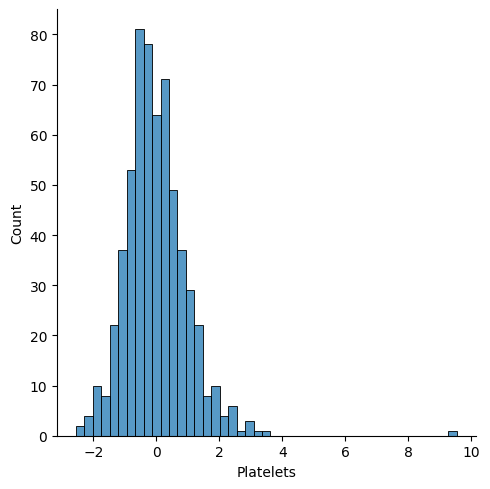

<Figure size 640x480 with 0 Axes>

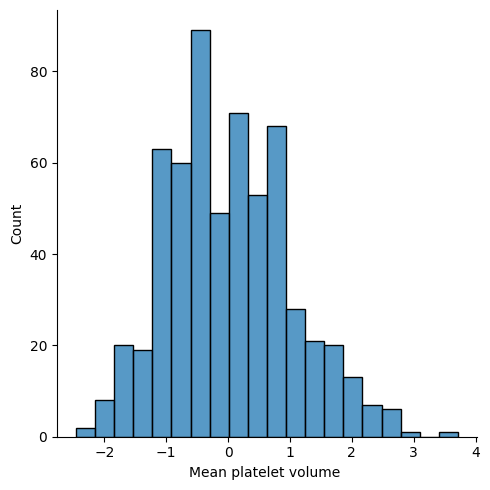

<Figure size 640x480 with 0 Axes>

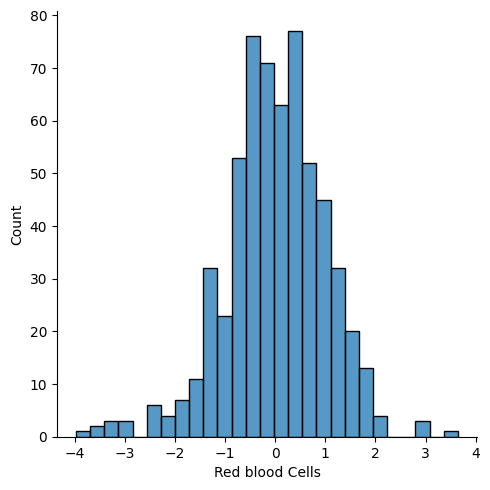

<Figure size 640x480 with 0 Axes>

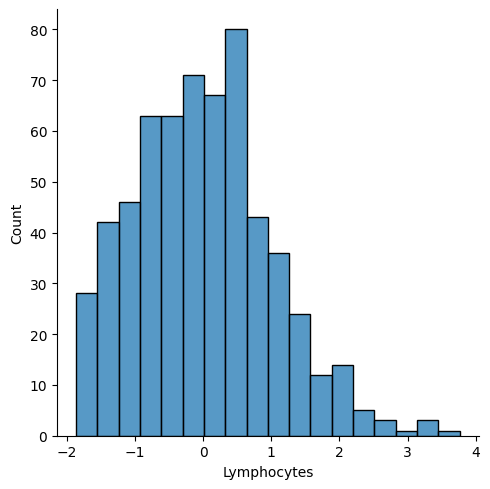

<Figure size 640x480 with 0 Axes>

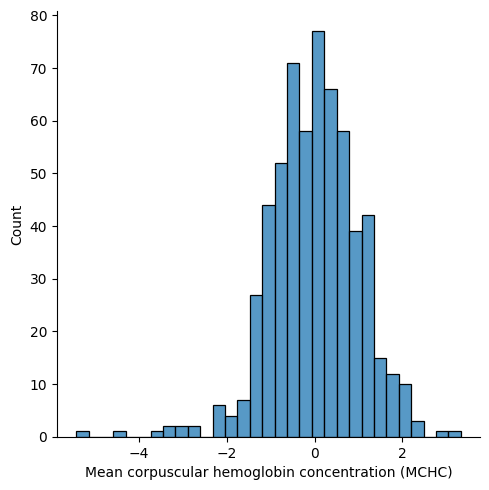

<Figure size 640x480 with 0 Axes>

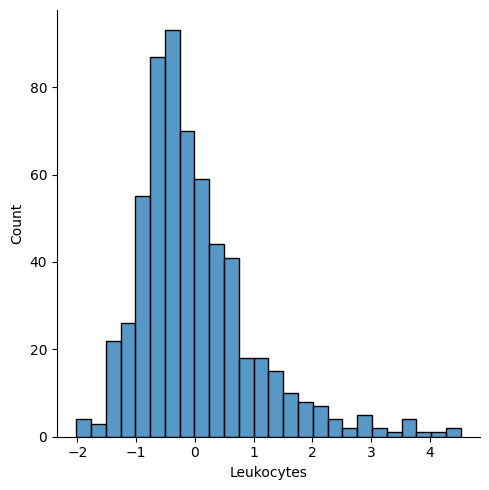

<Figure size 640x480 with 0 Axes>

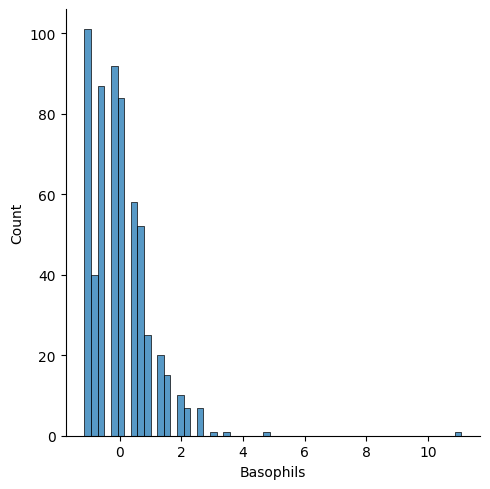

<Figure size 640x480 with 0 Axes>

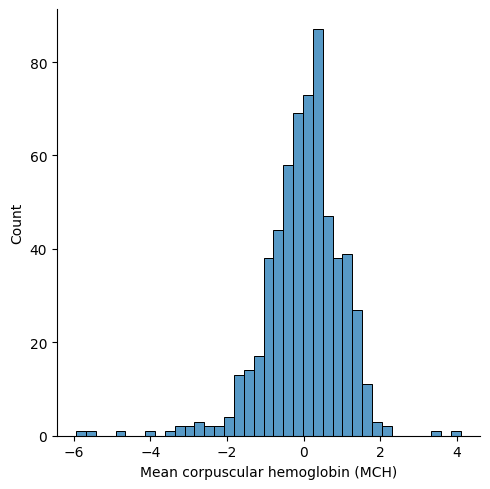

<Figure size 640x480 with 0 Axes>

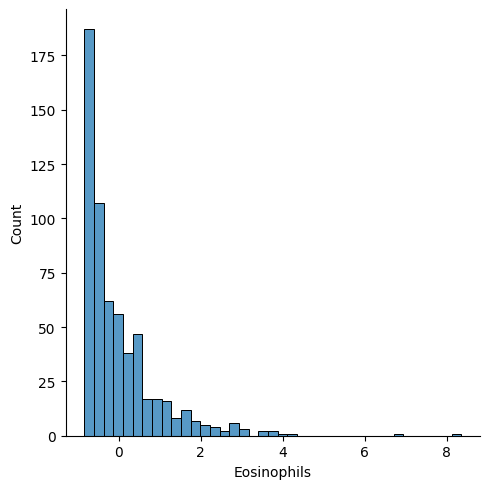

<Figure size 640x480 with 0 Axes>

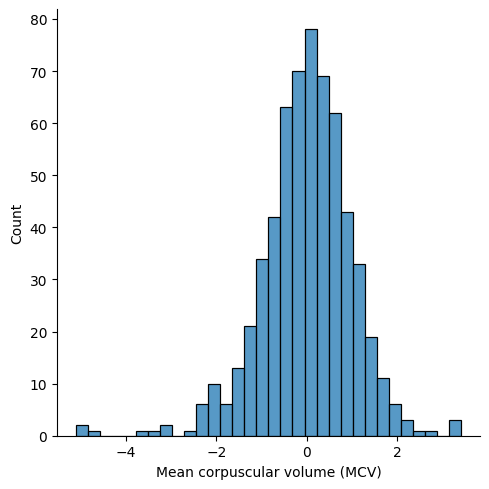

<Figure size 640x480 with 0 Axes>

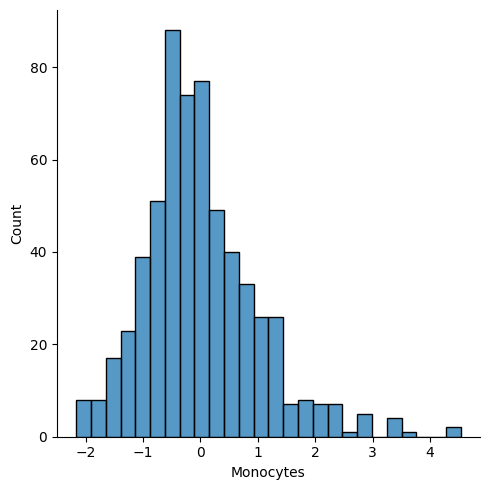

<Figure size 640x480 with 0 Axes>

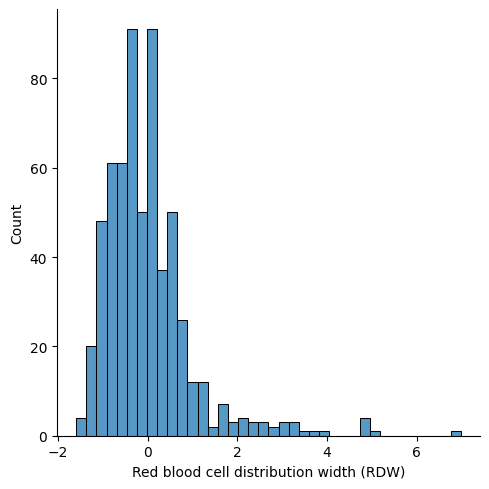

In [ ]:
for col in dataset.select_dtypes('float'):
    plt.figure()
    sns.displot(dataset[col] )

<Figure size 640x480 with 0 Axes>

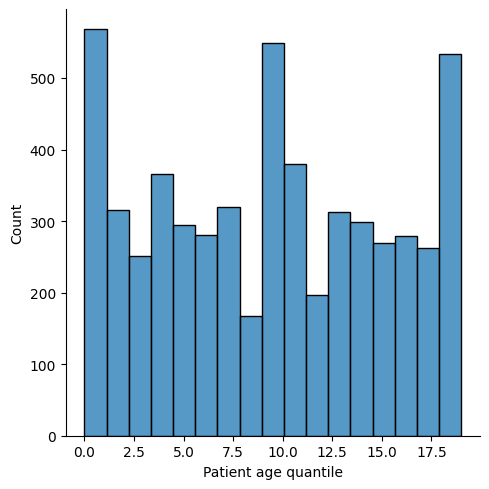

In [11]:
# Age quantile ne sert à rien : on ne sait pas à quoi les graduations fournies correspondent
plt.figure()
sns.displot(dataset['Patient age quantile'])

Analyse des données de type Object (qui sont les taux sanguins)

In [12]:
for col in dataset.select_dtypes('object'):
    print(f'{col :-<50} {dataset[col].unique()}')

Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus229E----------------------------------- [nan 'not_detected' 'detected']
Coro

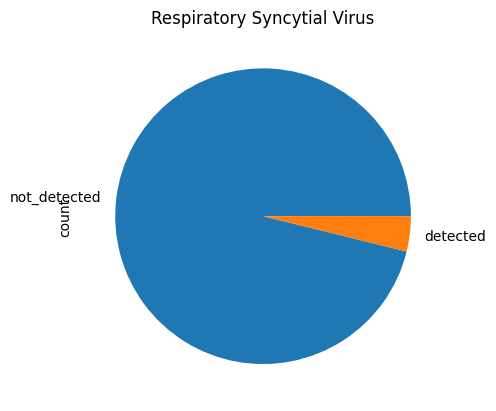

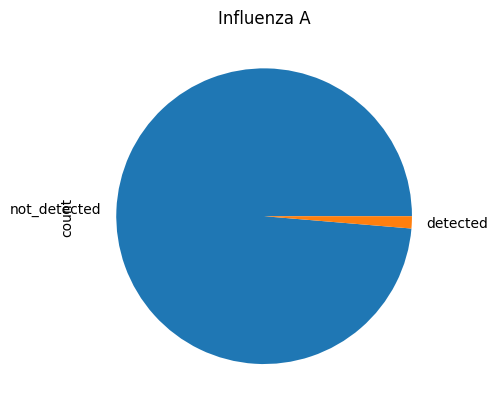

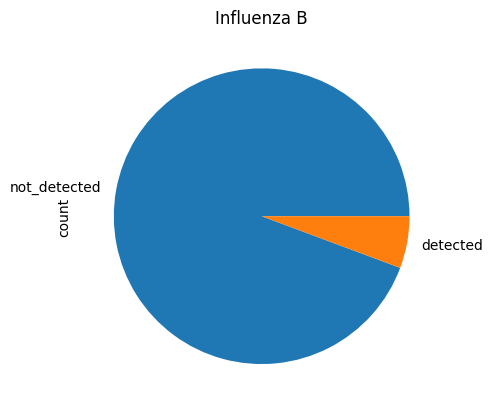

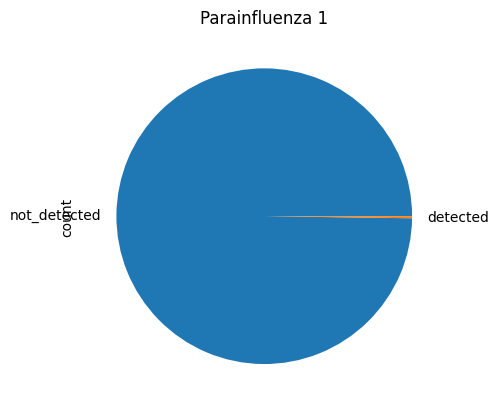

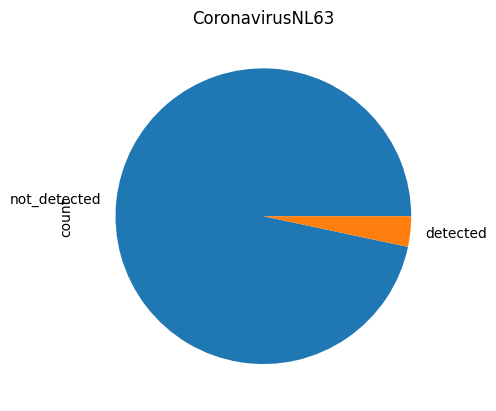

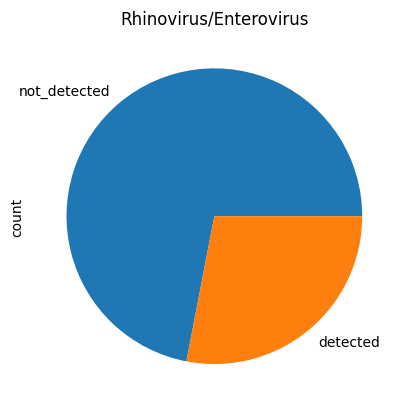

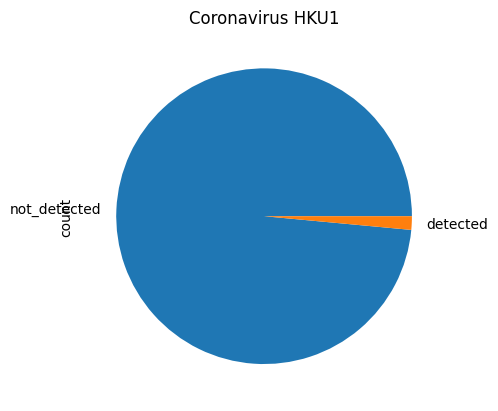

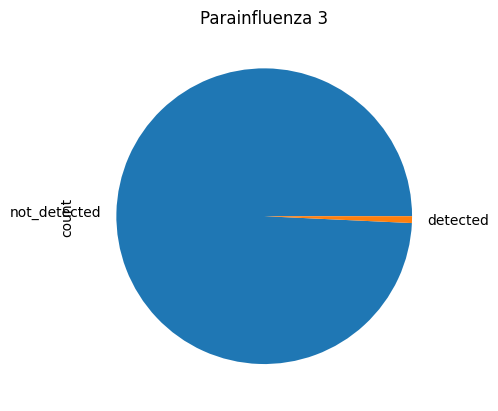

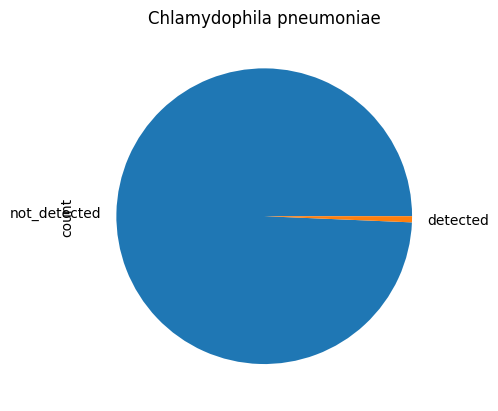

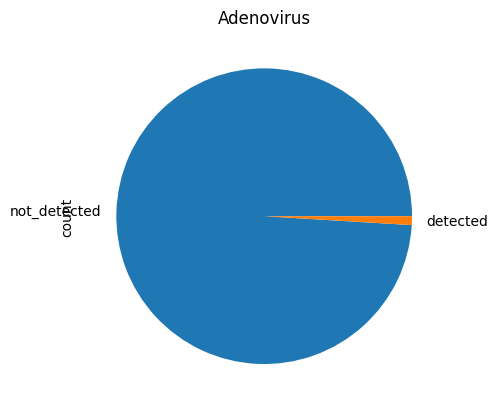

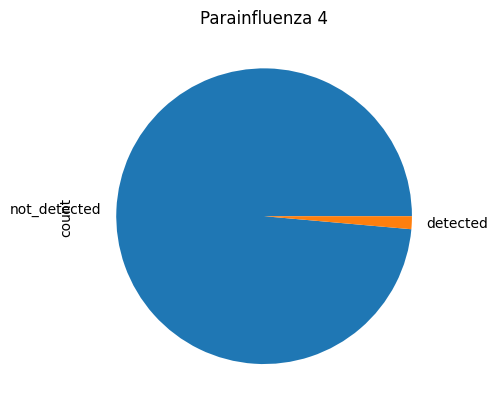

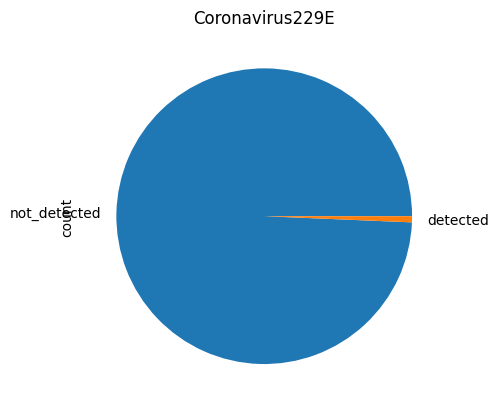

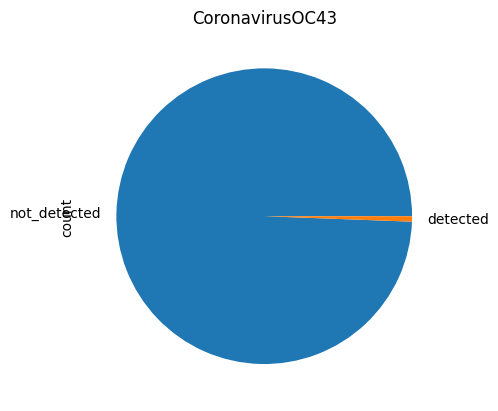

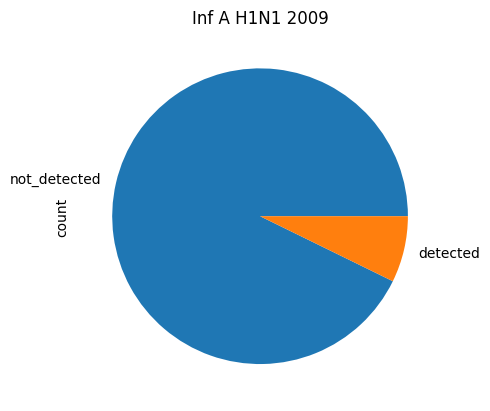

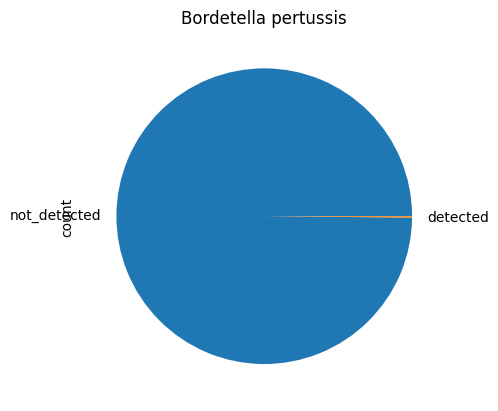

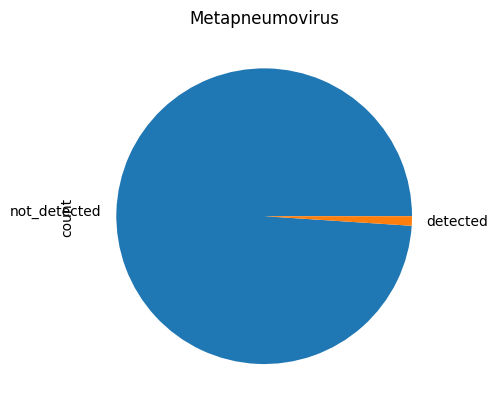

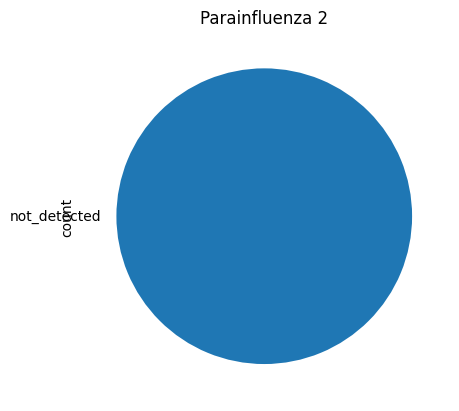

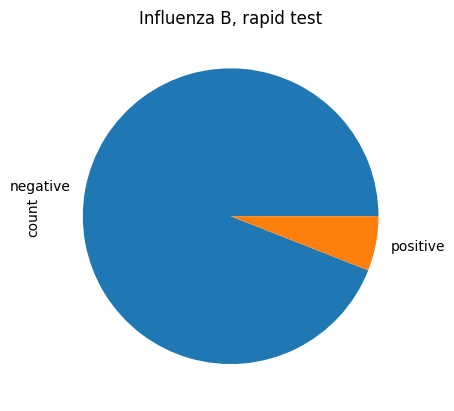

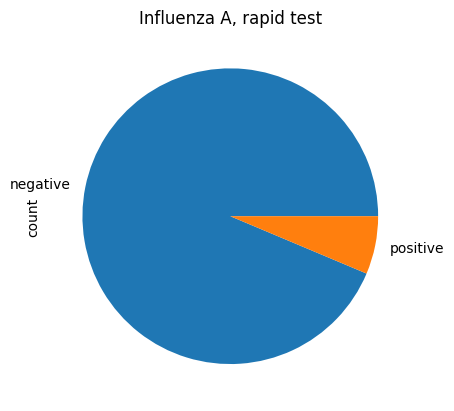

In [13]:
# Voir la distribution sous forme de camembert des données de type object
for col in dataset.select_dtypes('object'):
    plt.figure()
    plt.title(col)
    dataset[col].value_counts().plot.pie()

# Relations VARIABLES-TARGET

Création des sous-ensembles de données


In [ ]:

# Atteints ou non du COVID 19
positive_dataset = dataset[y=='positive']
negative_dataset = dataset[y=='negative']

# Celles à 76% de NaN (virus) et à 89% de NaN (blood)
missing_rate = dataset.isna().sum()/(dataset.shape[0])
blood_col = dataset.columns[(missing_rate<0.9) & (missing_rate>0.8) ]
blood_col = list(set(blood_col).intersection(set(dataset.select_dtypes('float').columns)))
virus_col = dataset.columns[(missing_rate<0.8) & (missing_rate>0.7)]

Données sur les taux sanguins

C:\Users\sami\AppData\Local\Temp\ipykernel_13784\775830798.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_dataset[col],label = 'positive')
C:\Users\sami\AppData\Local\Temp\ipykernel_13784\775830798.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_dataset[col],label = 'n

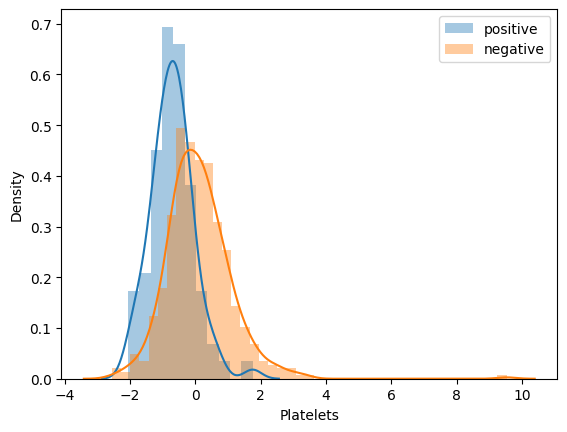

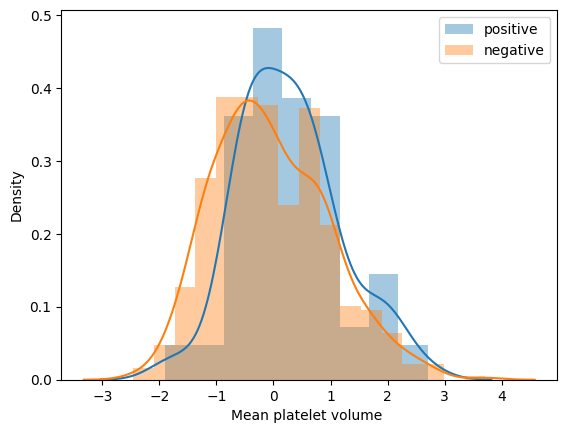

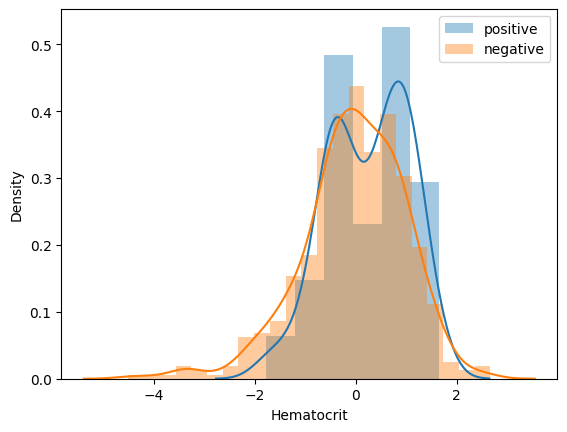

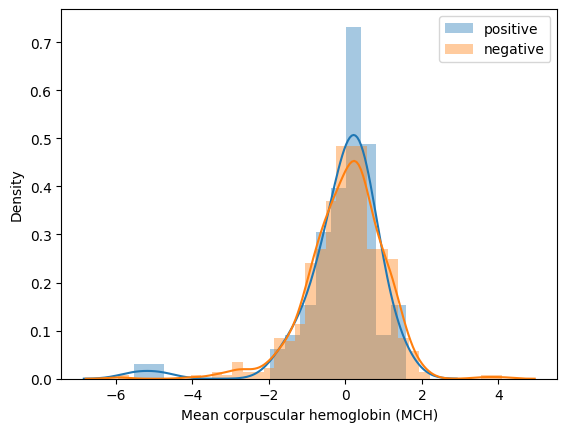

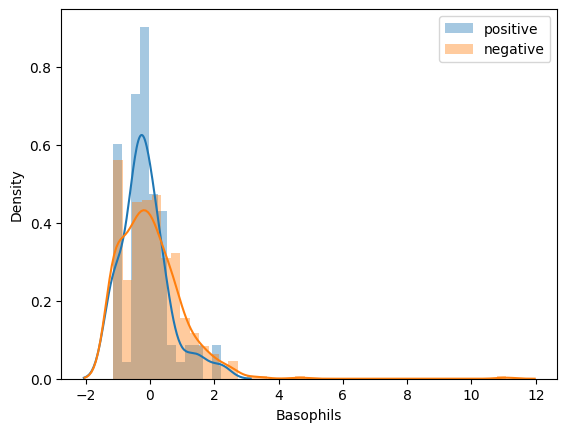

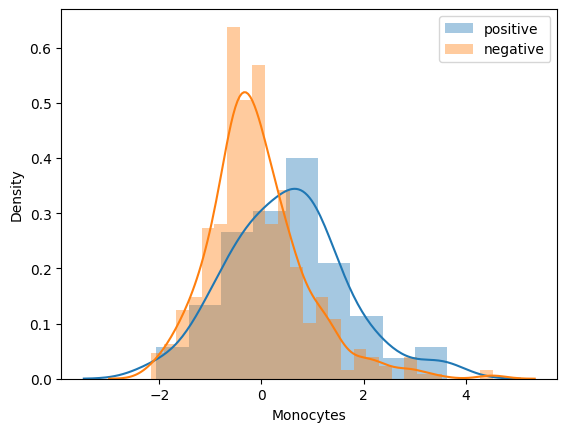

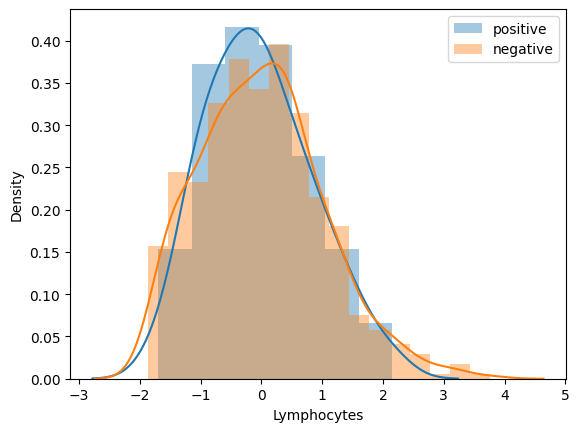

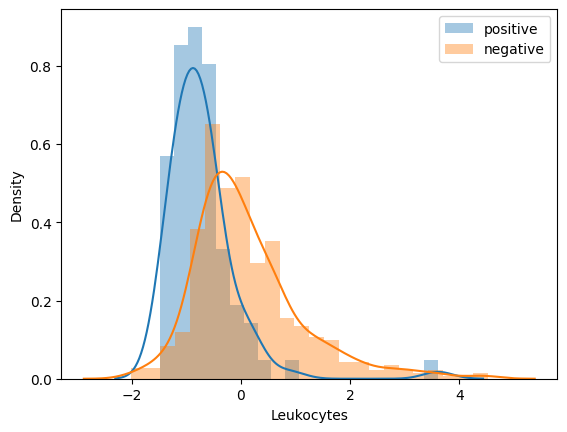

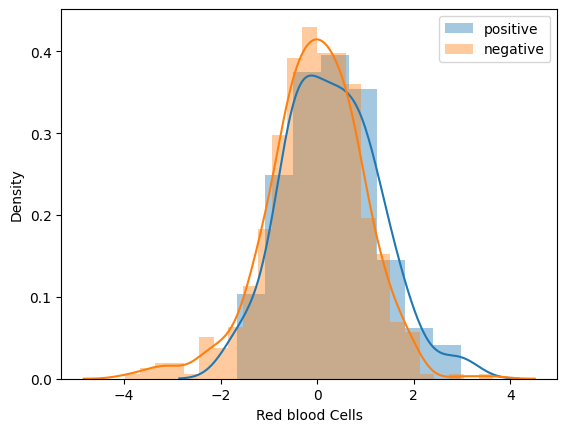

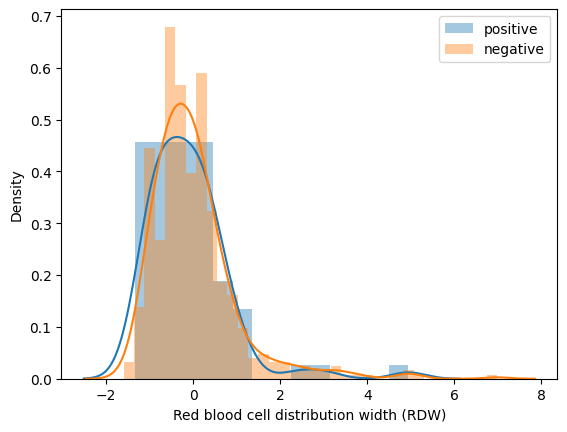

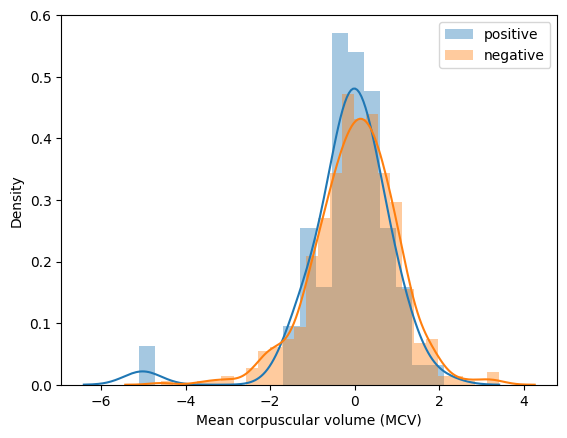

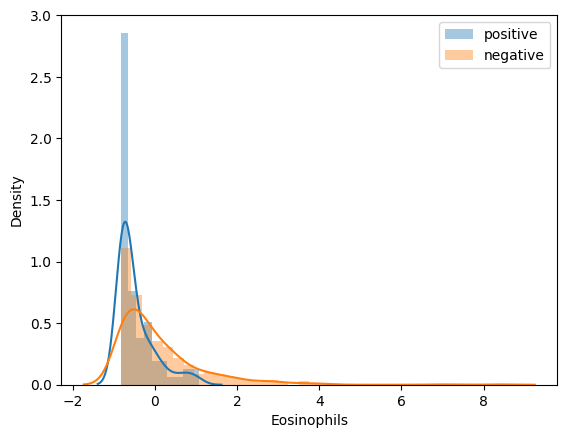

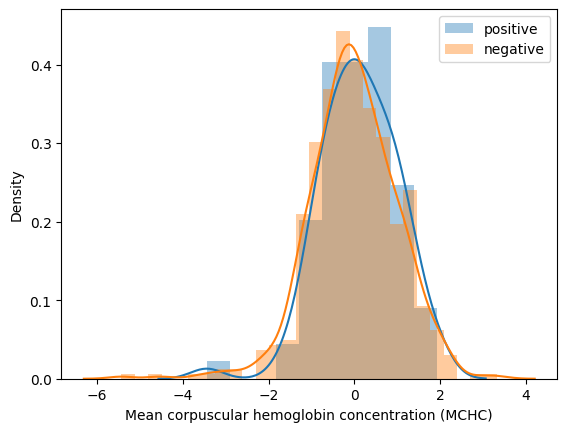

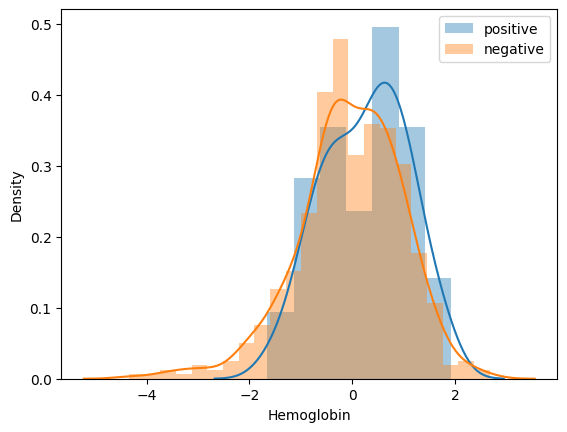

In [ ]:
# Platelets // Mean Platelet volume // Leukocytes // Monocytes diffèrent en fctn de pos/neg

for col in blood_col:
     # car après ce ne sont plus des fonnées flottantes
        plt.figure()
        sns.distplot(positive_dataset[col],label = 'positive')
        sns.distplot(negative_dataset[col],label = 'negative')
        plt.legend()
    

<Axes: xlabel='Patient age quantile', ylabel='count'>

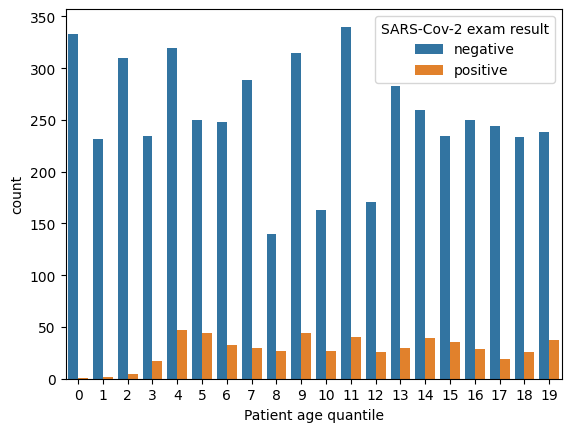

In [16]:
#AGE QUANTILE : on ne peut rien conclure car dans les faits, on sait que tt le monde peut etre affecté par le COVID19
plt.figure('Age quantile')
sns.countplot(x = 'Patient age quantile',hue = 'SARS-Cov-2 exam result',data = df)


Données virologiques selon le résultat du test covid


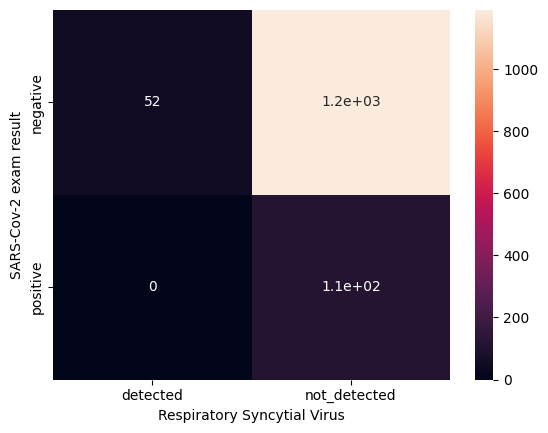

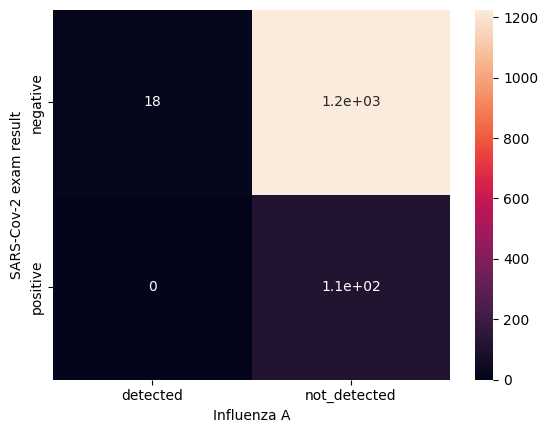

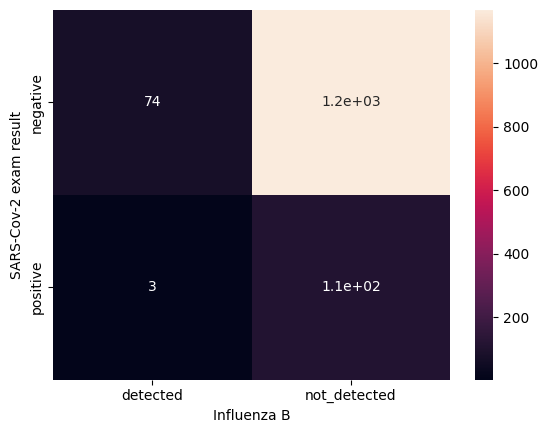

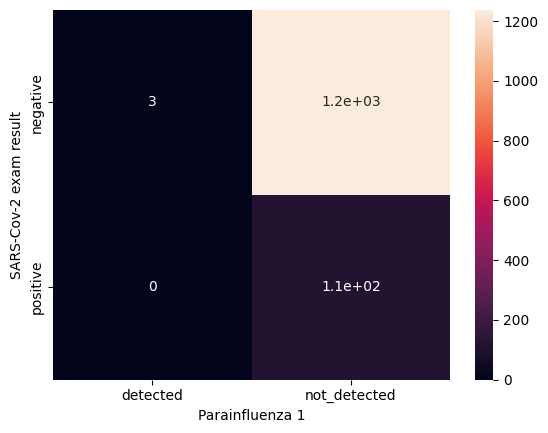

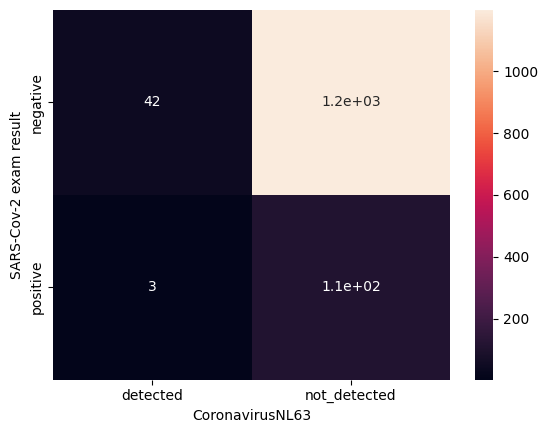

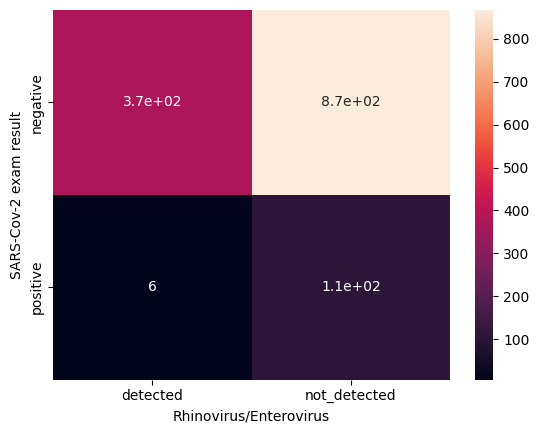

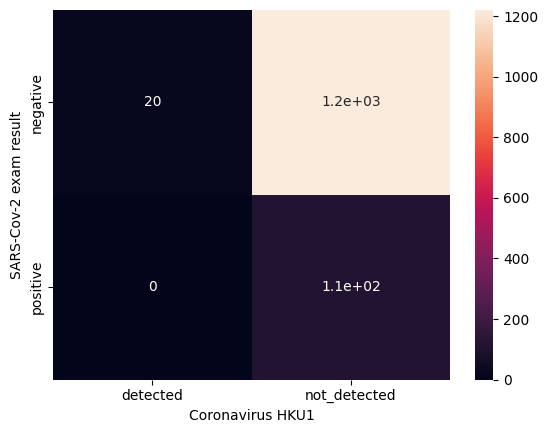

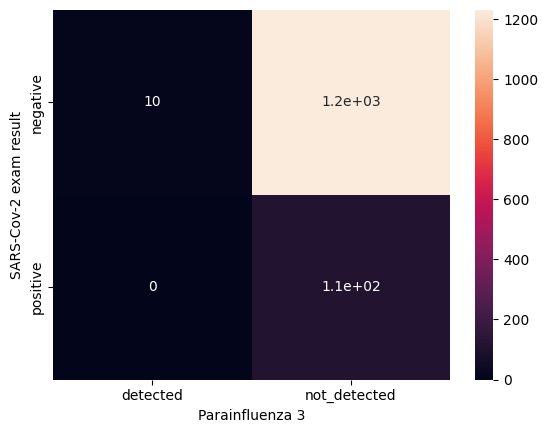

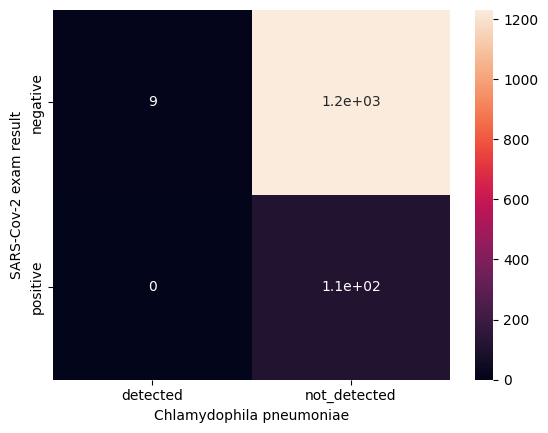

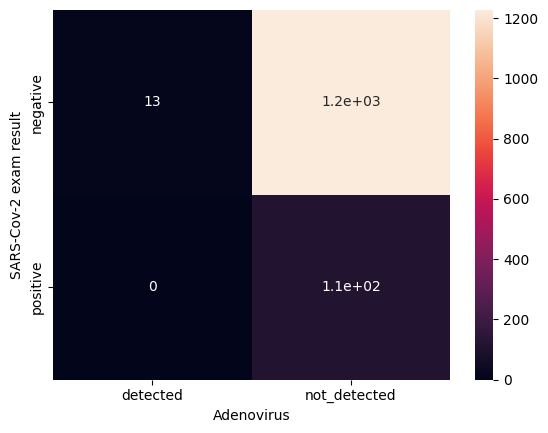

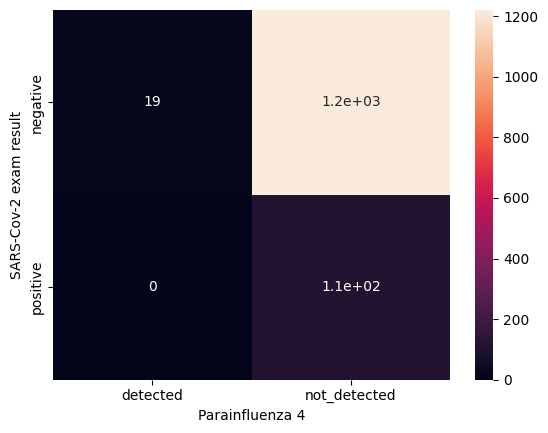

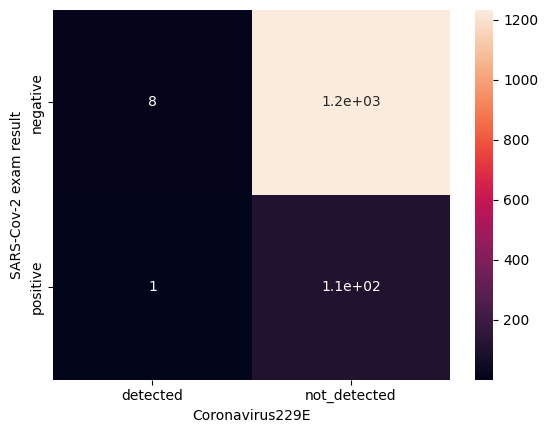

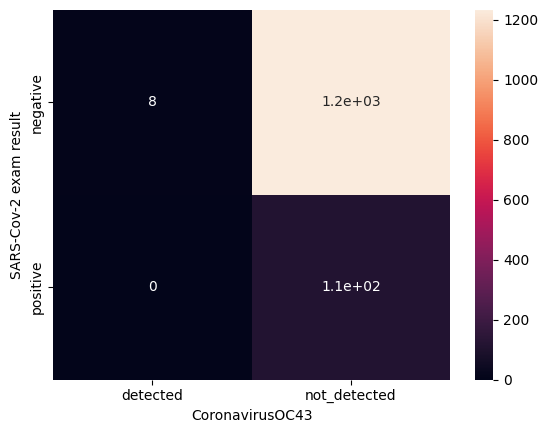

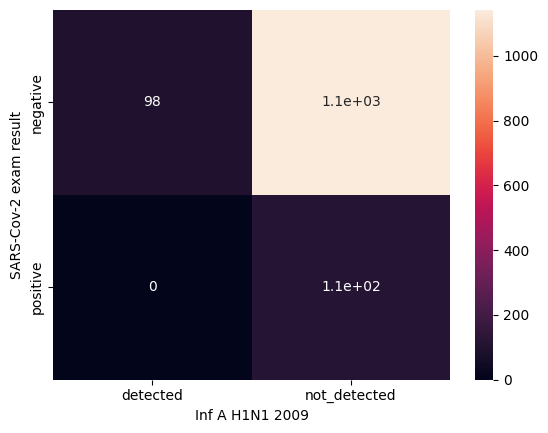

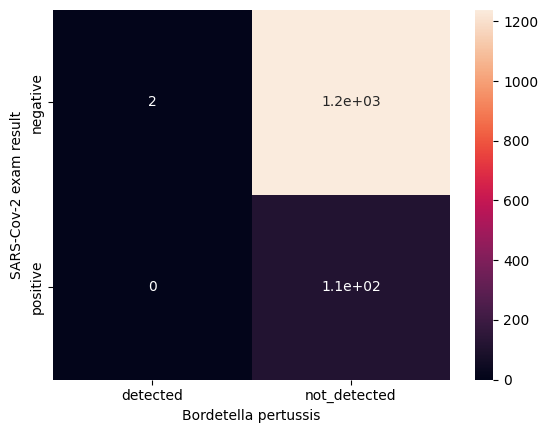

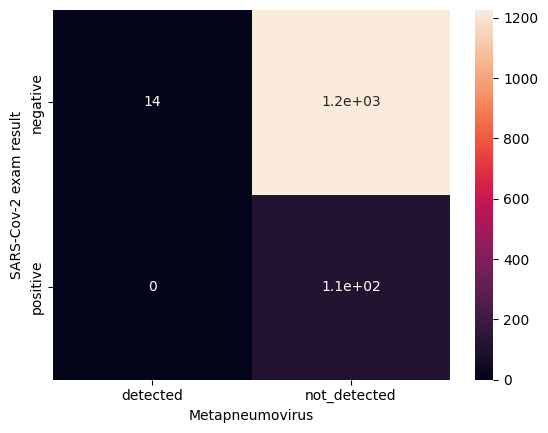

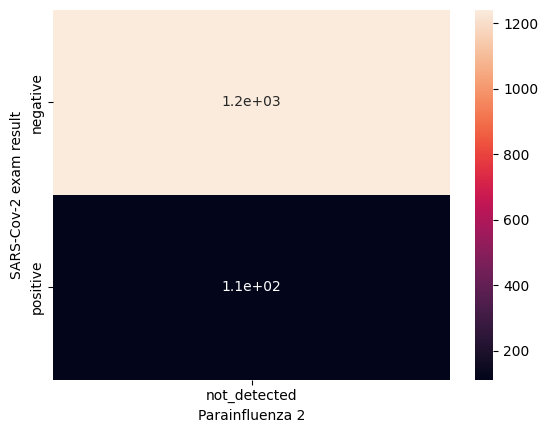

In [ ]:
for col in virus_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],dataset[col]),annot=True)

# RELATIONS VARIABLES-VARIABLES

Correlation entre le variables de taux sanguins


<Axes: >

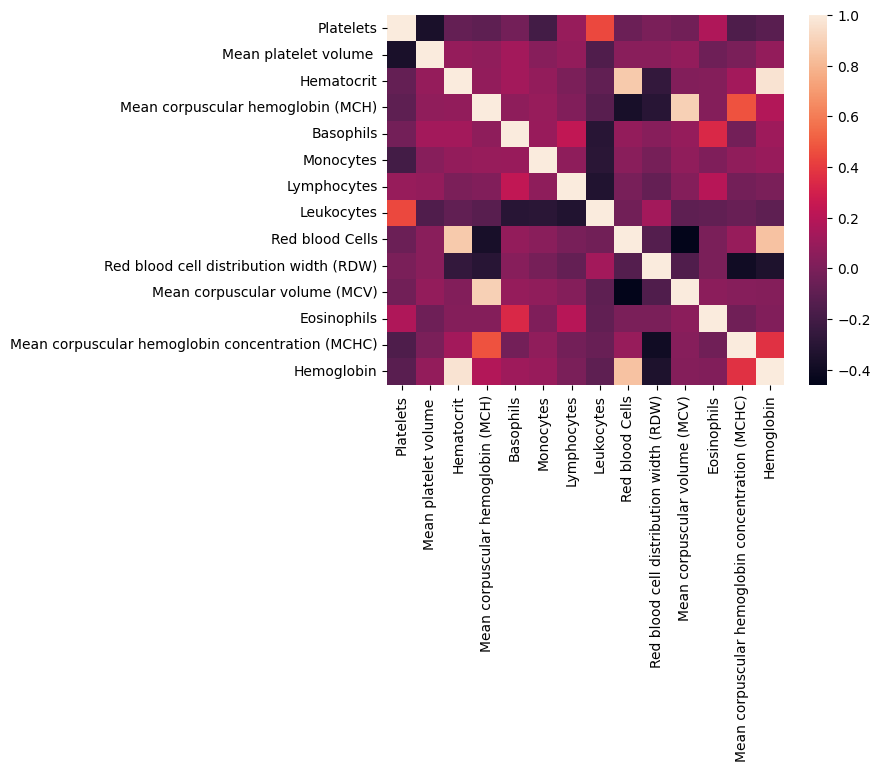

In [ ]:
plt.figure('Relations entre variables des blood_col')
sns.heatmap(dataset[blood_col].corr())


Correlation entre variables et age quantile faible


In [ ]:
print(df[blood_col+['Patient age quantile']].corr()['Patient age quantile'].sort_values())

Leukocytes                                         -0.166386
Platelets                                          -0.158683
Lymphocytes                                        -0.125935
Mean corpuscular hemoglobin concentration (MCHC)   -0.124671
Red blood Cells                                    -0.037510
Eosinophils                                         0.022085
Monocytes                                           0.050962
Hemoglobin                                          0.060320
Hematocrit                                          0.096808
Basophils                                           0.107525
Mean platelet volume                                0.119449
Red blood cell distribution width (RDW)             0.166429
Mean corpuscular hemoglobin (MCH)                   0.197394
Mean corpuscular volume (MCV)                       0.281655
Patient age quantile                                1.000000
Name: Patient age quantile, dtype: float64


Créationde nouveaux sous-ensembles:


In [ ]:
dataset['est_malade'] = np.sum(dataset[virus_col[:-2]]=='detected',axis=1)>=1
malade = dataset[dataset['est_malade']==True]
pas_malade = dataset[dataset['est_malade']==False]


Taux sanguins pour les maladies autres que COVID
Leucocytes et Monocytes => COVID
Alors que lymphocytes => autre maladie
et Leucocyte / Monocyte pas marqueurs d'autres maladie


C:\Users\sami\AppData\Local\Temp\ipykernel_13784\2400259332.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade[col],label = 'malade')
C:\Users\sami\AppData\Local\Temp\ipykernel_13784\2400259332.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pas_malade[col],label = 'pas malade')
C:\U

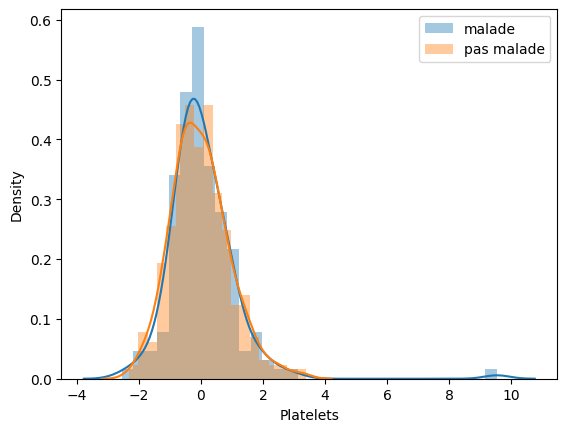

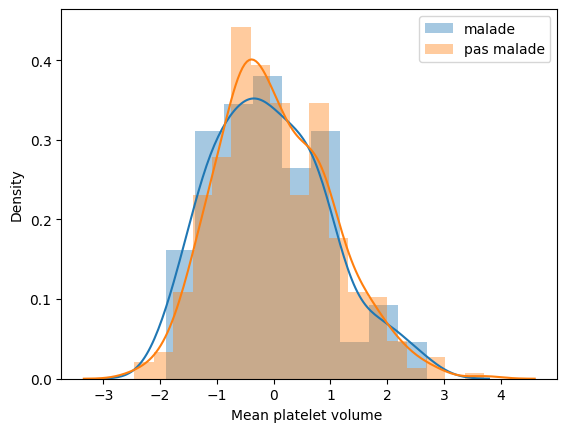

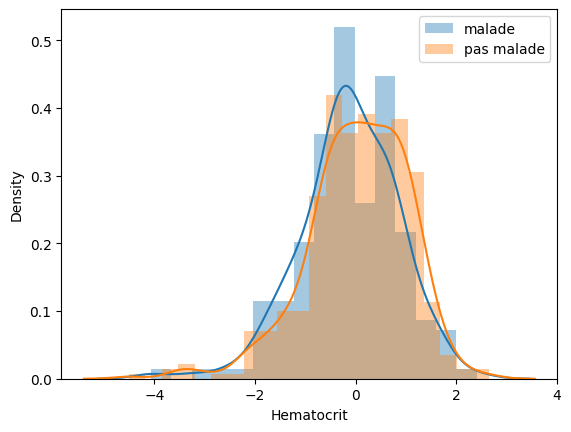

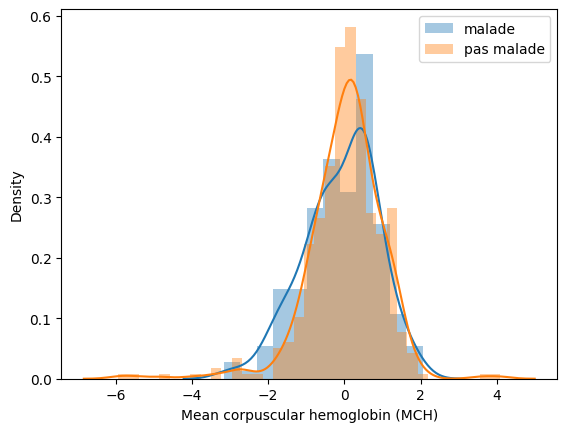

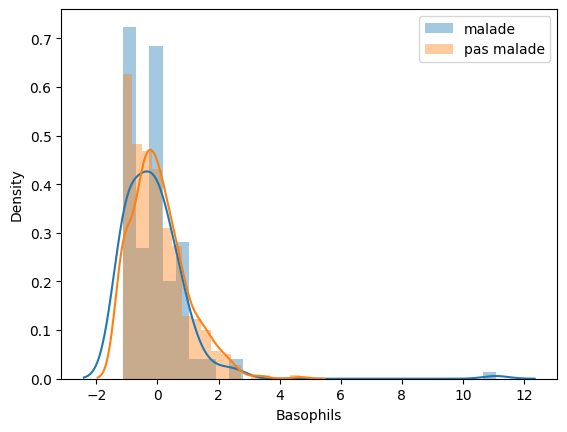

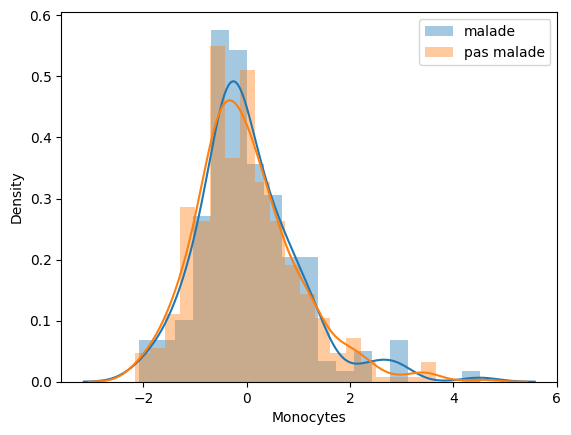

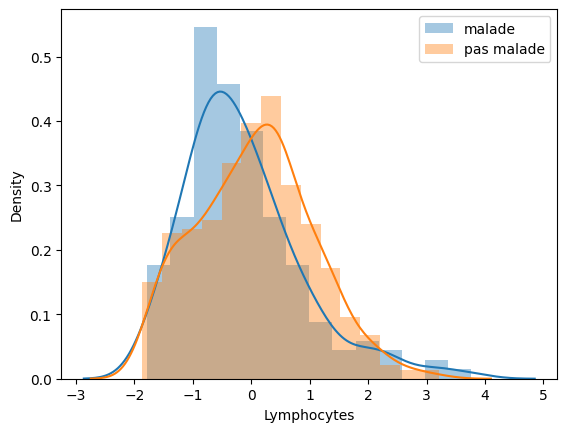

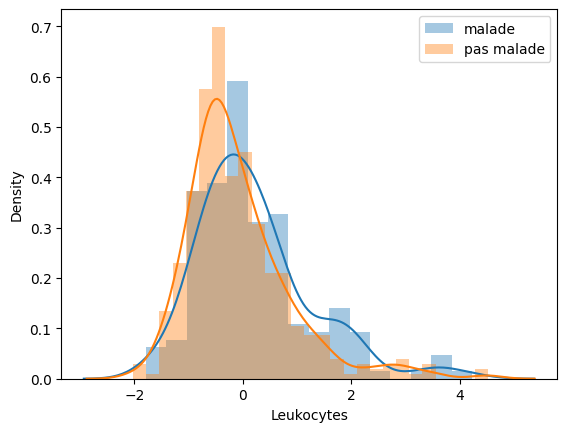

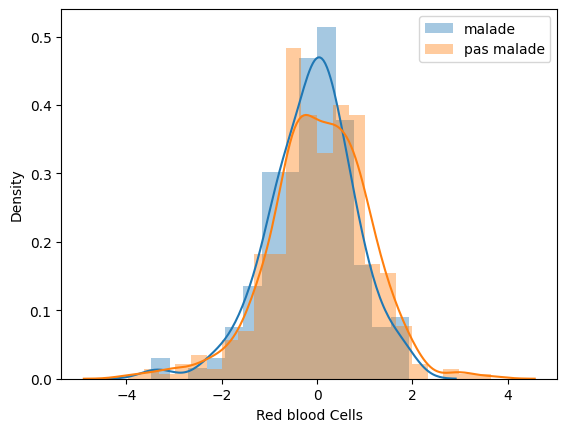

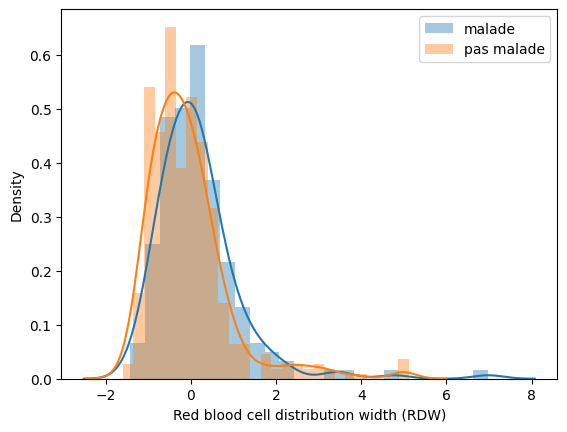

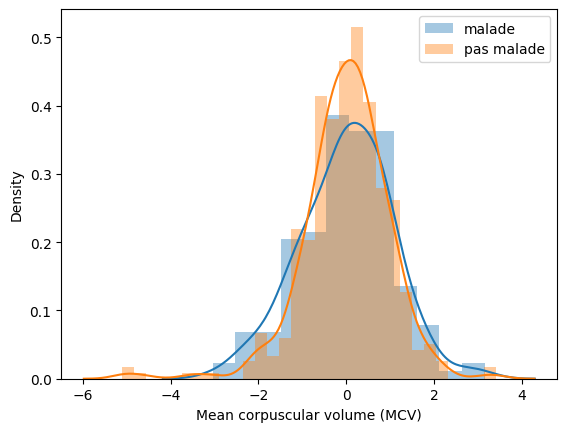

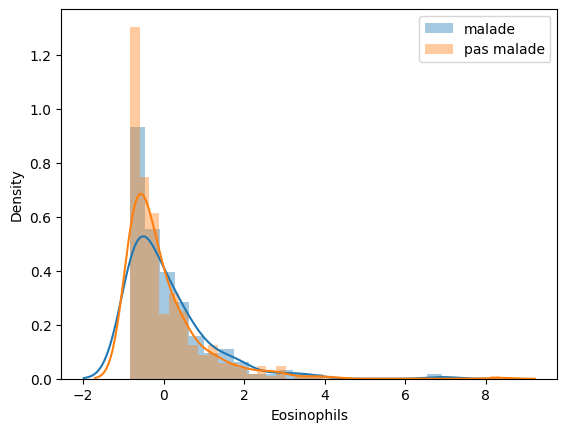

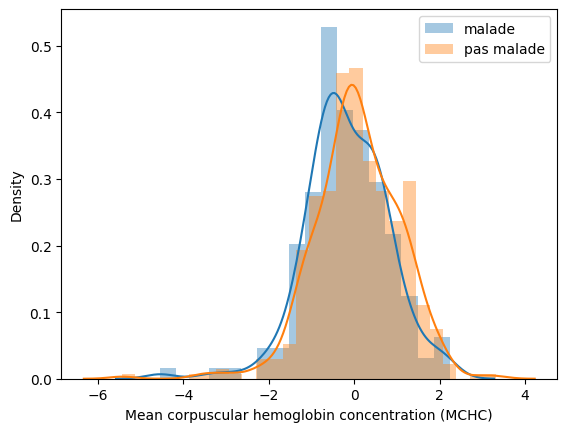

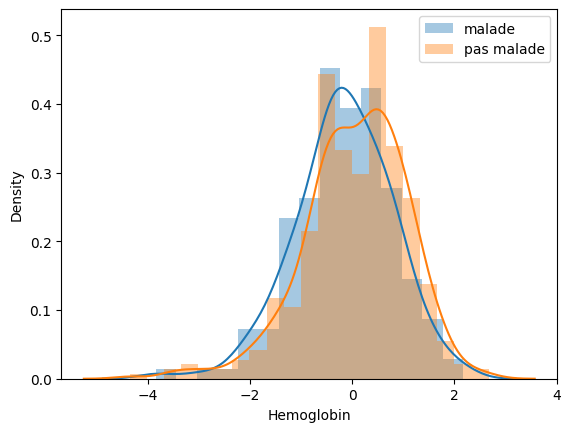

In [ ]:
for col in blood_col:
    plt.figure()
    sns.distplot(malade[col],label = 'malade')
    sns.distplot(pas_malade[col],label = 'pas malade')
    plt.legend()


# Analyse du statut d'hospitalisation

[None 'semi-intensive' 'regular' 'intensive']


C:\Users\sami\AppData\Local\Temp\ipykernel_13784\42967538.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['statut']==statut][col],label = statut)
c:\dev\machineLearning\.venv\lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\dev\machineLearning\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\dev\machineLearning\.venv\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\

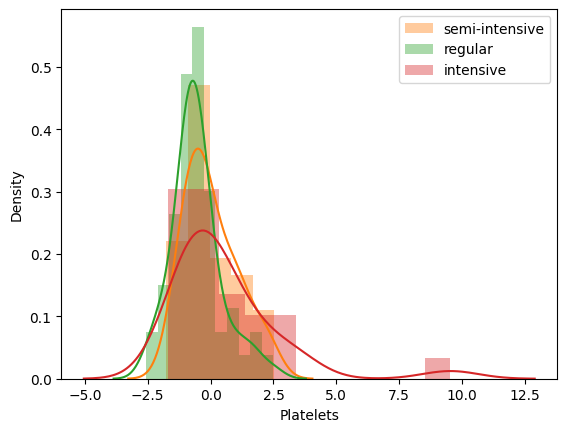

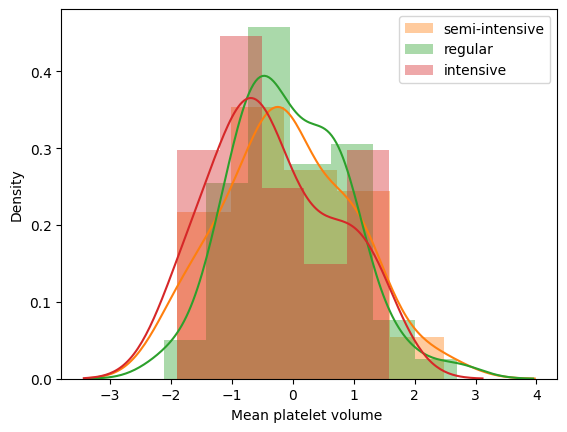

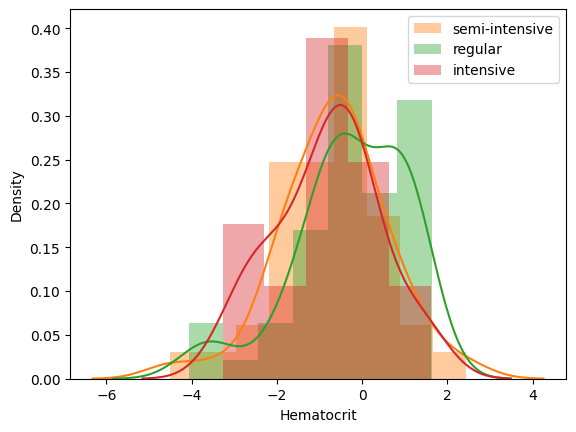

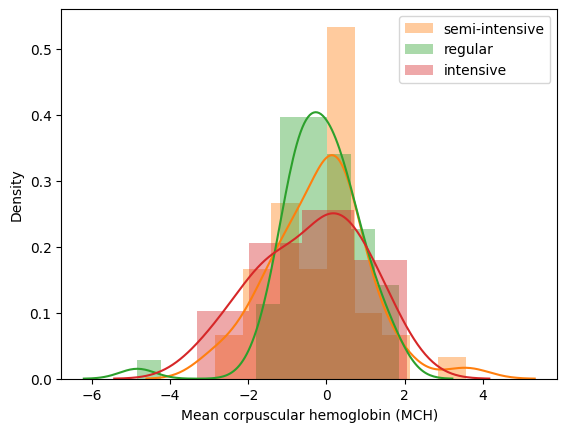

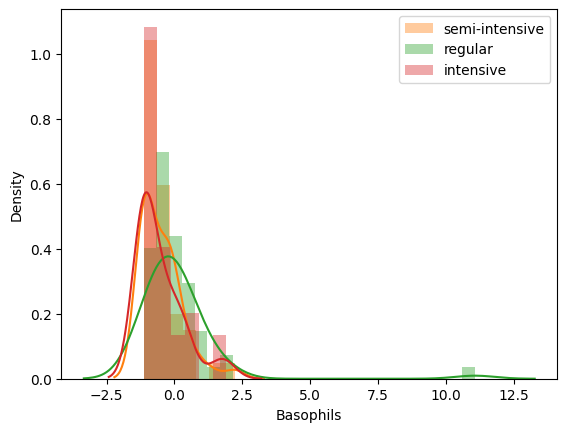

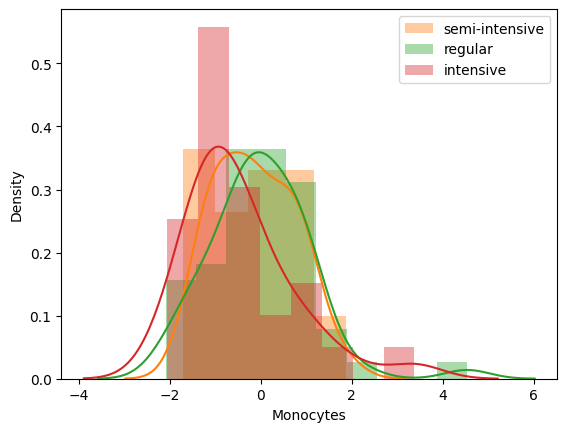

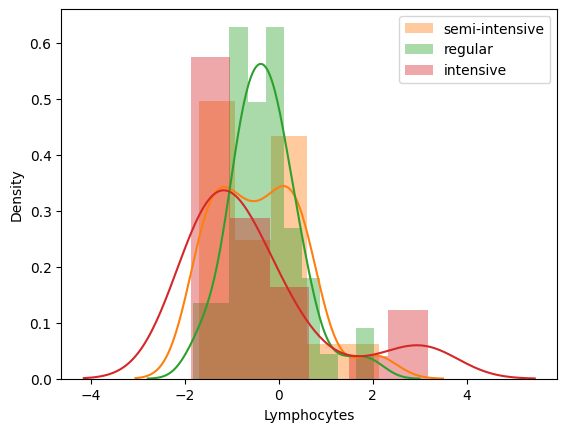

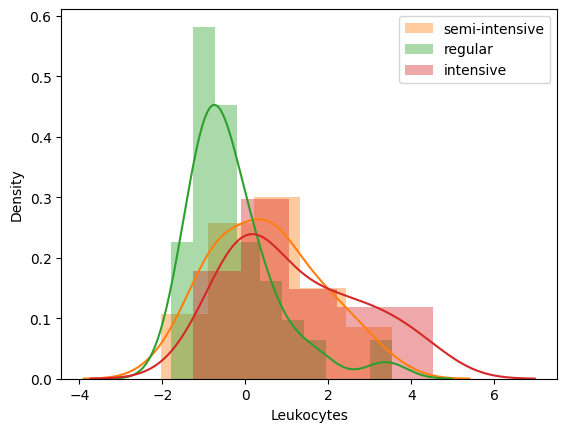

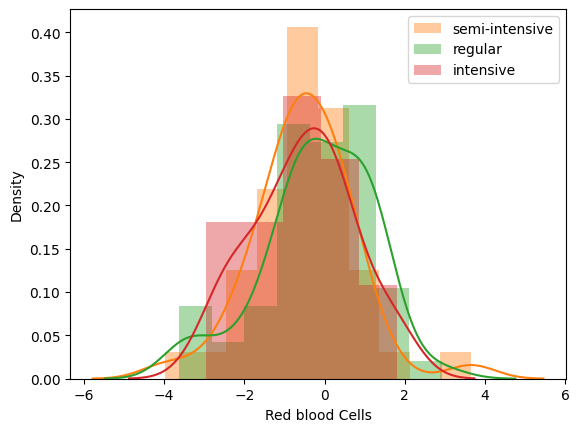

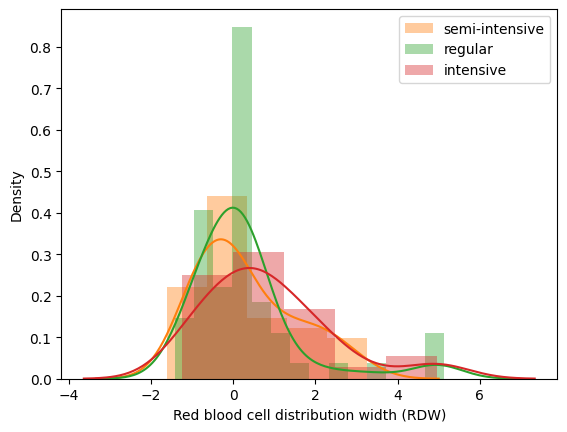

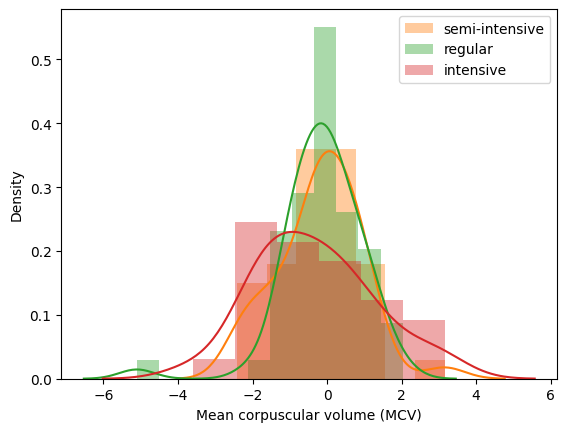

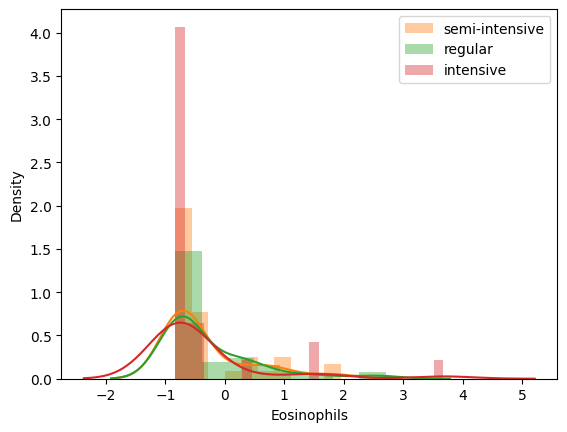

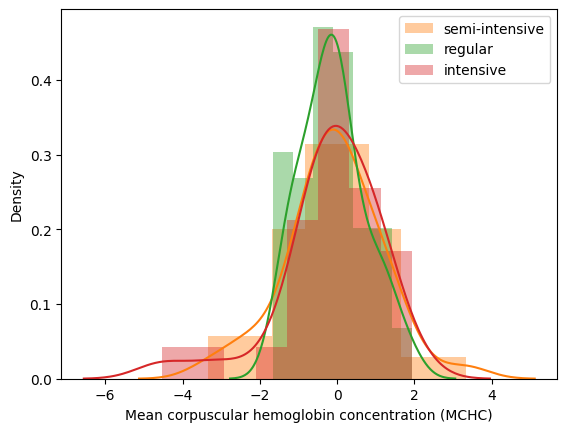

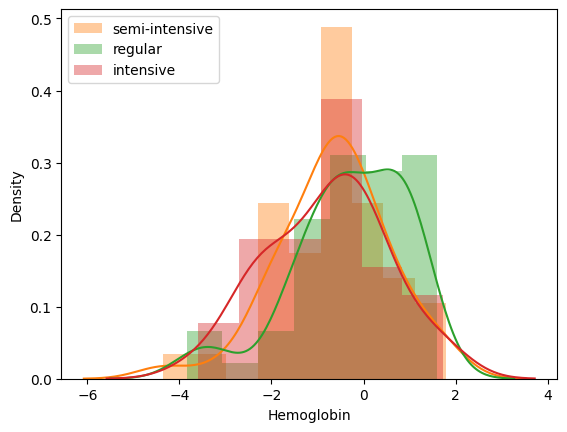

In [ ]:
def hospitalisation(dataset):
    if dataset['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'regular'
    if dataset['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    if dataset['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive'
    
dataset['statut']=dataset.apply(hospitalisation,axis=1)

print(dataset['statut'].unique())

for col in blood_col:
    plt.figure()
    for statut in dataset['statut'].unique():
        sns.distplot(dataset[dataset['statut']==statut][col],label = statut)
    plt.legend()
    

Lequel des deux sous_groupe nous donne le plus d'info entre blood_col et virus_col ?

In [ ]:

print('\n blood_col\n',dataset[blood_col].count()) 
print('\n virus_col\n',dataset[virus_col].count())



 blood_col
 Platelets                                           602
Mean platelet volume                                599
Hematocrit                                          603
Mean corpuscular hemoglobin (MCH)                   602
Basophils                                           602
Monocytes                                           601
Lymphocytes                                         602
Leukocytes                                          602
Red blood Cells                                     602
Red blood cell distribution width (RDW)             602
Mean corpuscular volume (MCV)                       602
Eosinophils                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Hemoglobin                                          603
dtype: int64

 virus_col
 Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                13

Etat de la target si on ne garde que les données remplies de certaines colonnes


In [ ]:
#Colonnes virus_col
df1 = dataset[virus_col[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
print('\nPourcentage de pos et neg si on ne garde que les virus_col\n',df1.dropna()['covid'].value_counts(normalize=True))

#Colonnes blood_col
df2 = dataset[blood_col[:-2]]
df2['covid'] = df['SARS-Cov-2 exam result']
print('\nPourcentage de pos et neg si on ne garde que les blood_col\n',df2.dropna()['covid'].value_counts(normalize=True))




Pourcentage de pos et neg si on ne garde que les virus_col
 covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

Pourcentage de pos et neg si on ne garde que les blood_col
 covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64


C:\Users\sami\AppData\Local\Temp\ipykernel_13784\2110819091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']
C:\Users\sami\AppData\Local\Temp\ipykernel_13784\2110819091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


# Hypothèse nulle
H0 : "Les taux sanguins moyens sont égaux entre pos et neg"
Le but est d'invalider cette hypothèse avec let test de Student

In [34]:
from scipy.stats import ttest_ind

In [37]:
# On tire aléatoirement un sous-ensemble de negative_dataset de la taille de positive_dataset
negative_dataset_sized = negative_dataset.sample(positive_dataset.shape[0])

Fonction de test pour H0

In [ ]:
#Teste si la moyenne pour chaque colonne est différente pour les cas pos et neg

def t_test(col):
    alpha = 0.02
    stat,p = ttest_ind(negative_dataset_sized[col].dropna(),positive_dataset[col].dropna())
    if p<alpha:
        return 'H0 fausse'
    else:
        return 0

Pertinence des variables

Ainsi, Platelets, Hematocrit, Monocytes, Leukocytes, Red blood Cells Eosinophilis et Hemoglobin permettent de discriminer les pos des neg

In [38]:
for col in blood_col:
    print(f'{col:-<50} {t_test(col)}')

Platelets----------------------------------------- H0 fausse
Mean platelet volume ----------------------------- 0
Hematocrit---------------------------------------- H0 fausse
Mean corpuscular hemoglobin (MCH)----------------- 0
Basophils----------------------------------------- 0
Monocytes----------------------------------------- H0 fausse
Lymphocytes--------------------------------------- 0
Leukocytes---------------------------------------- H0 fausse
Red blood Cells----------------------------------- H0 fausse
Red blood cell distribution width (RDW)----------- 0
Mean corpuscular volume (MCV)--------------------- 0
Eosinophils--------------------------------------- H0 fausse
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Hemoglobin---------------------------------------- H0 fausse
